# Earthquake Data Visualizations
This notebook provides various visualizations for earthquake data in Turkey.

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = 'turkey_earthquakes.csv'
earthquake_data = pd.read_csv(file_path)

# Convert date and time columns to datetime for better handling
earthquake_data['datetime'] = pd.to_datetime(earthquake_data['Olus tarihi'] + ' ' + earthquake_data['Olus zamani'], format='%Y.%m.%d %H:%M:%S.%f')

# Set Seaborn theme for better aesthetics
sns.set(style="whitegrid")

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_16984\2801980727.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
earthquake_data.describe()

,No,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,datetime
count,20307.000000,2.030700e+04,20307.000000,20307.000000,20307.000000,20307.000000,20307.000000,20307.000000,7326.000000,20307.000000,20307.000000,20307
mean,10154.000000,1.999319e+13,38.046572,32.508673,14.657108,3.981410,1.686231,2.324519,3.800205,0.456980,1.127390,1999-09-22 22:38:46.202852224
min,1.000000,1.915021e+13,35.000000,26.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1915-02-14 08:20:00.600000
25%,5077.500000,1.988053e+13,36.830000,27.600000,5.000000,3.600000,0.000000,0.000000,3.600000,0.000000,0.000000,1988-05-25 09:47:58.900000
50%,10154.000000,2.004051e+13,38.106500,29.860000,8.300000,3.800000,0.000000,3.500000,3.900000,0.000000,0.000000,2004-05-14 16:34:18.600000
75%,15230.500000,2.016011e+13,39.116350,37.345000,14.000000,4.200000,3.700000,4.000000,4.500000,0.000000,3.500000,2016-01-11 12:41:11.139999744
max,20307.000000,2.023123e+13,41.998200,44.999200,199.000000,7.900000,7.200000,7.500000,7.700000,7.900000,7.100000,2023-12-31 22:28:46.510000
std,5862.270294,2.040180e+11,1.594676,5.832697,20.563169,0.529157,1.988864,2.026609,1.380935,1.410644,1.914429,NaN


In [5]:
numeric_df = earthquake_data.select_dtypes(include=['number'])
numeric_df = numeric_df[['Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb']]
numeric_df.corr()

,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb
Enlem,1.000000,0.277485,-0.240141,0.014932,0.093229,-0.086949,0.077176,0.054980,0.039092
Boylam,0.277485,1.000000,-0.139269,0.060719,-0.037867,0.051141,-0.111075,-0.008337,-0.080214
Derinlik,-0.240141,-0.139269,1.000000,0.289326,0.118437,0.091737,0.246285,0.313062,0.337813
xM,0.014932,0.060719,0.289326,1.000000,0.176163,0.420210,0.577806,0.647182,0.552906
MD,0.093229,-0.037867,0.118437,0.176163,1.000000,-0.405172,0.484435,0.425702,0.073062
ML,-0.086949,0.051141,0.091737,0.420210,-0.405172,1.000000,0.412567,0.321300,0.104268
Mw,0.077176,-0.111075,0.246285,0.577806,0.484435,0.412567,1.000000,0.490036,0.486174
Ms,0.054980,-0.008337,0.313062,0.647182,0.425702,0.321300,0.490036,1.000000,0.620059
Mb,0.039092,-0.080214,0.337813,0.552906,0.073062,0.104268,0.486174,0.620059,1.000000


## Visualization 1: Frequency of Earthquakes Over Time

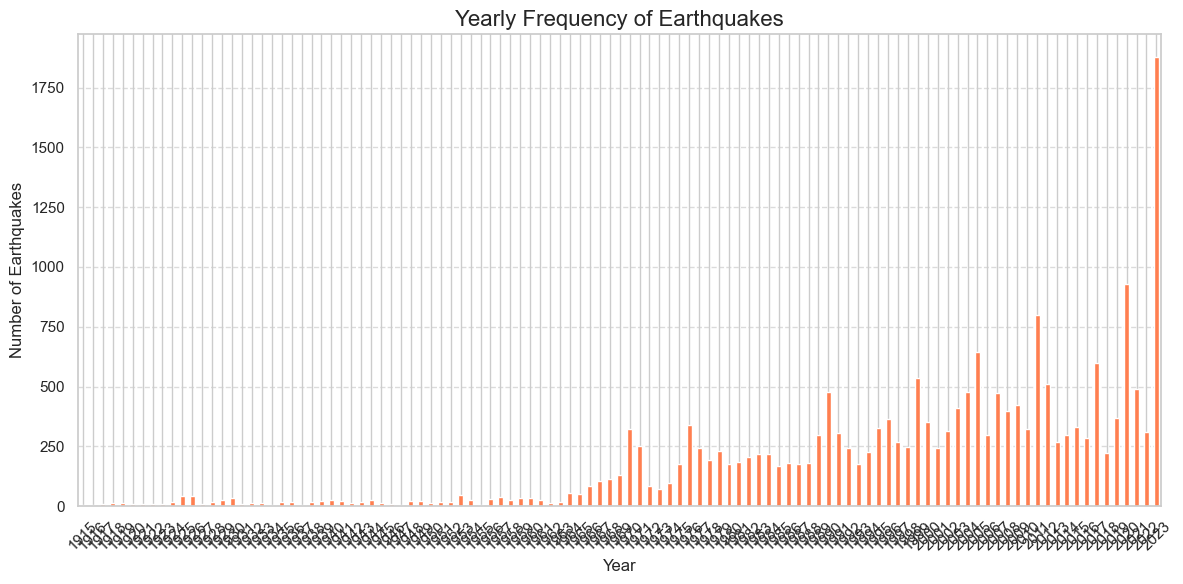

In [6]:
# Improved visualization with yearly grouping for better readability
earthquake_data['year'] = earthquake_data['datetime'].dt.year

plt.figure(figsize=(12, 6))
earthquake_data.groupby('year').size().plot(kind='bar', color='coral')

# Customize the plot for better aesthetics
plt.title('Yearly Frequency of Earthquakes', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the updated plot
plt.show()


C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_16984\2136369828.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  earthquake_data.groupby('5_year_bin').size().plot(kind='bar', color='lightseagreen')


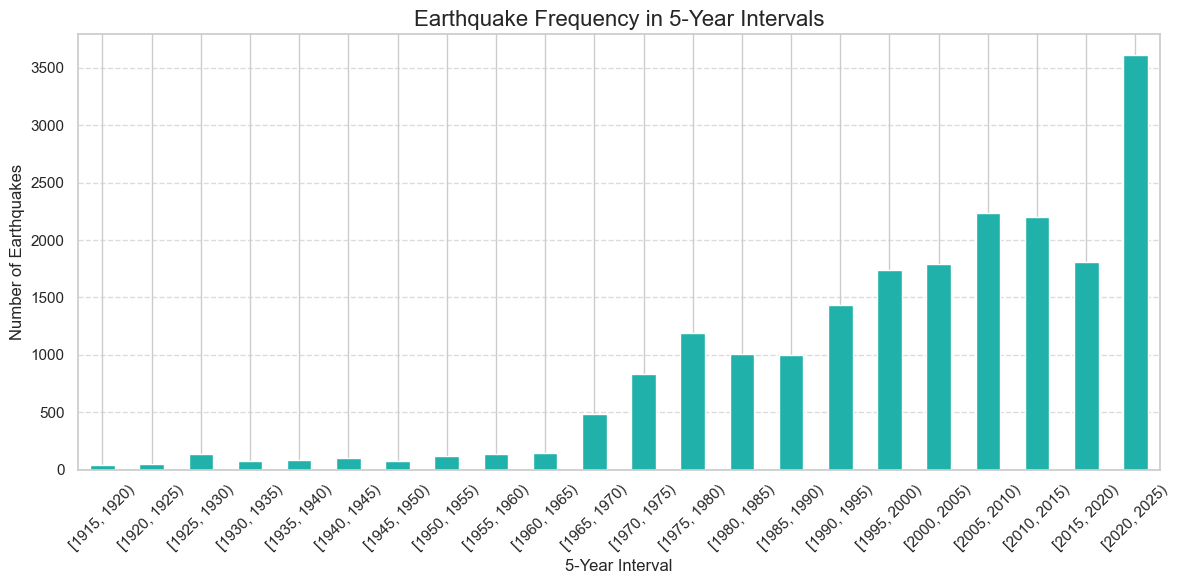

In [7]:
# Group the data into 5-year intervals
earthquake_data['year'] = earthquake_data['datetime'].dt.year

# Create 5-year bins
bins = range(earthquake_data['year'].min(), earthquake_data['year'].max() + 5, 5)
earthquake_data['5_year_bin'] = pd.cut(earthquake_data['year'], bins=bins, right=False)

# Plot the data grouped by 5-year intervals
plt.figure(figsize=(12, 6))
earthquake_data.groupby('5_year_bin').size().plot(kind='bar', color='lightseagreen')

# Customize the plot for better aesthetics
plt.title('Earthquake Frequency in 5-Year Intervals', fontsize=16)
plt.xlabel('5-Year Interval', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the updated plot
plt.show()


### calculate how many years the peak of earthquakes repeats.

In [8]:
# Group the data by year and calculate the number of earthquakes per year
earthquakes_per_year = earthquake_data.groupby('year').size()

# Find the local maxima (peaks) in the data
from scipy.signal import find_peaks

# Identify the years where peaks occur
peaks, _ = find_peaks(earthquakes_per_year.values)

# Extract the years of the peaks
peak_years = earthquakes_per_year.index[peaks]

# Calculate the differences between consecutive peaks
peak_intervals = peak_years[1:] - peak_years[:-1]

# Convert to a list and calculate the average interval between peaks
average_interval = peak_intervals.to_list()
average_interval = sum(average_interval) / len(average_interval)

# Display the peak years, intervals between peaks, and the average interval
peak_years, peak_intervals, average_interval


(Index([1918, 1922, 1925, 1930, 1933, 1936, 1940, 1944, 1948, 1953, 1957, 1960,
        1964, 1970, 1976, 1979, 1984, 1986, 1990, 1996, 1999, 2005, 2007, 2009,
        2011, 2015, 2017, 2020],
       dtype='int32', name='year'),
 Index([4, 3, 5, 3, 3, 4, 4, 4, 5, 4, 3, 4, 6, 6, 3, 5, 2, 4, 6, 3, 6, 2, 2, 2,
        4, 2, 3],
       dtype='int32', name='year'),
 3.7777777777777777)

## Visualization 2: Distribution of Earthquake Depth

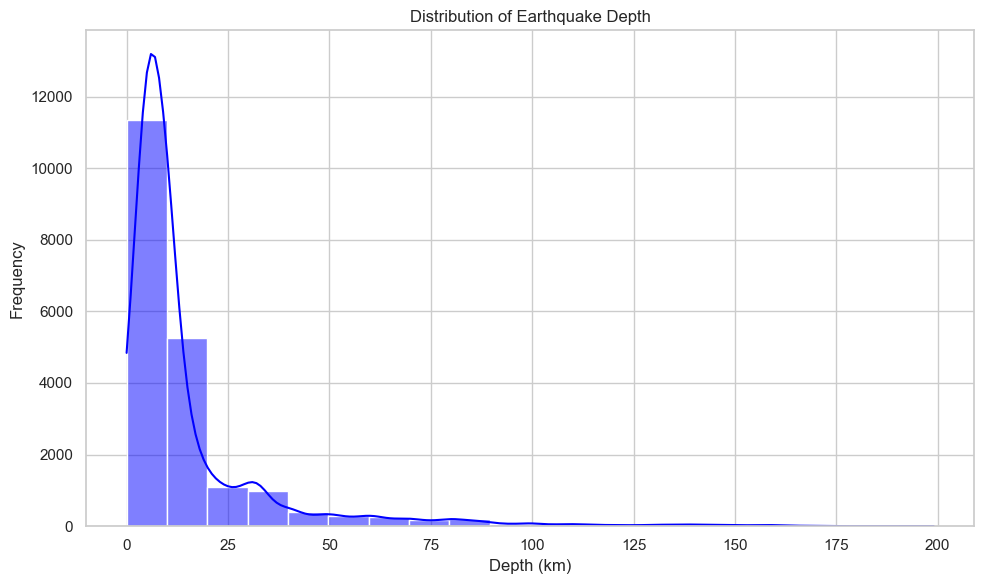

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_data['Derinlik'], kde=True, bins=20, color='blue')
plt.title('Distribution of Earthquake Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Ranking of earthquakes according to depth

In [10]:
# Sort the earthquake data by depth (Derinlik) in ascending order
sorted_by_depth = earthquake_data.sort_values(by='Derinlik', ascending=True)

# Display the top 10 shallowest earthquakes (closest to the surface)
shallowest_earthquakes = sorted_by_depth.head(10)

# Show the result
shallowest_earthquakes


,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,datetime,year,5_year_bin
13266,13267,19950609225119,1995.06.09,22:51:19.60,39.51,36.46,0.0,3.7,3.7,0.0,NaN,0.0,0.0,Ke,ABDALLI-SARKISLA (SIVAS) [South West 2.2 km],1995-06-09 22:51:19.600,1995,"[1995, 2000)"
12280,12281,19980920075437,1998.09.20,07:54:37.40,36.85,35.49,0.0,3.5,3.5,0.0,NaN,0.0,0.0,Ke,BELOREN-YUREGIR (ADANA) [North West 7.4 km],1998-09-20 07:54:37.400,1998,"[1995, 2000)"
16898,16899,19790825033705,1979.08.25,03:37:05.00,35.40,26.52,0.0,4.0,0.0,4.0,NaN,0.0,0.0,Ke,AKDENIZ,1979-08-25 03:37:05.000,1979,"[1975, 1980)"
12286,12287,19980902033824,1998.09.02,03:38:24.60,36.16,31.65,0.0,3.6,3.6,0.0,NaN,0.0,0.0,Ke,AKDENIZ,1998-09-02 03:38:24.600,1998,"[1995, 2000)"
12288,12289,19980829035933,1998.08.29,03:59:33.20,39.71,39.26,0.0,3.8,3.8,0.0,NaN,0.0,0.0,Ke,YASTIKTEPE-KEMAH (ERZINCAN) [North 5.0 km],1998-08-29 03:59:33.200,1998,"[1995, 2000)"
16895,16896,19790828012638,1979.08.28,01:26:38.50,35.45,26.52,0.0,4.0,0.0,4.0,NaN,0.0,0.0,Ke,AKDENIZ,1979-08-28 01:26:38.500,1979,"[1975, 1980)"
12296,12297,19980807013612,1998.08.07,01:36:12.70,37.91,43.24,0.0,4.4,4.4,0.0,NaN,0.0,0.0,Ke,BUKEC-GURPINAR (VAN) [South West 4.6 km],1998-08-07 01:36:12.700,1998,"[1995, 2000)"
16884,16885,19790914131514,1979.09.14,13:15:14.00,37.23,30.08,0.0,3.8,0.0,0.0,NaN,0.0,3.8,Ke,TASKESIGI-KORKUTELI (ANTALYA) [North East 1.0...,1979-09-14 13:15:14.000,1979,"[1975, 1980)"
16881,16882,19790917020053,1979.09.17,02:00:53.60,36.68,29.32,0.0,3.5,0.0,0.0,NaN,0.0,3.5,Ke,ATLIDERE-FETHIYE (MUGLA) [West 3.9 km],1979-09-17 02:00:53.600,1979,"[1975, 1980)"
16876,16877,19790922130150,1979.09.22,13:01:50.30,37.08,29.06,0.0,3.7,0.0,0.0,NaN,0.0,3.7,Ke,SANDALCIK-ACIPAYAM (DENIZLI) [South West 3.5 km],1979-09-22 13:01:50.300,1979,"[1975, 1980)"


## Visualization 3: Magnitude Distribution (using Mw)

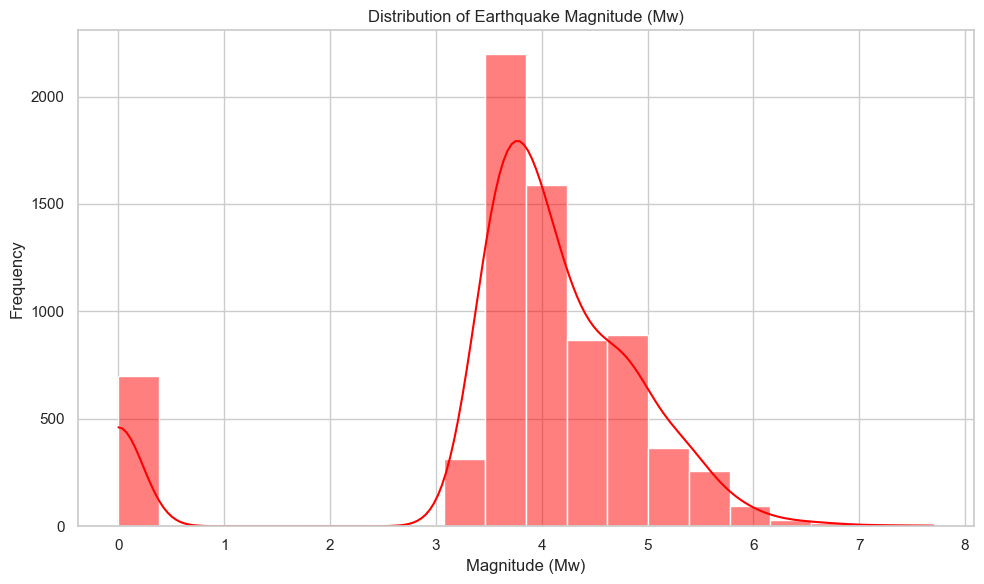

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_data['Mw'], kde=True, bins=20, color='red')
plt.title('Distribution of Earthquake Magnitude (Mw)')
plt.xlabel('Magnitude (Mw)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Ranking of earthquakes according to magnitude

In [12]:
# Sort the earthquake data by magnitude (Mw) in descending order
sorted_by_magnitude = earthquake_data.sort_values(by='xM', ascending=False)

# Display the top 10 largest earthquakes
largest_earthquakes = sorted_by_magnitude.head(10)

# Show the result
largest_earthquakes


,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,datetime,year,5_year_bin
19920,19921,19391226235720,1939.12.26,23:57:20.90,39.8000,39.5100,20.0,7.9,7.2,7.2,7.7,7.9,7.1,Ke,KURUTILEK- (ERZINCAN) [North East 3.0 km],1939-12-26 23:57:20.900,1939,"[1935, 1940)"
1823,1824,20230206011732,2023.02.06,01:17:32.67,37.1757,37.0850,5.5,7.7,0.0,7.5,7.7,0.0,0.0,Ke,YAMACOBA-SEHITKAMIL (GAZIANTEP) [North West 0...,2023-02-06 01:17:32.670,2023,"[2020, 2025)"
20138,20139,19260626194638,1926.06.26,19:46:38.80,36.5400,27.3300,100.0,7.7,7.1,7.0,7.2,7.7,6.9,Ke,ONIKI ADALAR (AKDENIZ),1926-06-26 19:46:38.800,1926,"[1925, 1930)"
1635,1636,20230206102447,2023.02.06,10:24:47.88,38.0818,37.1773,5.0,7.6,0.0,7.4,7.6,0.0,0.0,Ke,EKINOZU (KAHRAMANMARAS) [North West 2.7 km],2023-02-06 10:24:47.880,2023,"[2020, 2025)"
20063,20064,19300506223431,1930.05.06,22:34:31.70,37.9800,44.4800,70.0,7.6,7.0,7.0,7.1,7.6,6.9,Ke,TÜRKIYE-IRAN SINIR BÖLGESI,1930-05-06 22:34:31.700,1930,"[1930, 1935)"
17550,17551,19761124122216,1976.11.24,12:22:16.00,39.0500,44.0400,10.0,7.5,0.0,0.0,NaN,7.5,6.1,Ke,YENIYAKA-CALDIRAN (VAN) [South East 1.9 km],1976-11-24 12:22:16.000,1976,"[1975, 1980)"
12009,12010,19990817000137,1999.08.17,00:01:37.60,40.7600,29.9700,18.0,7.4,6.7,0.0,7.4,0.0,0.0,Ke,BASISKELE (KOCAELI) [North East 2.0 km],1999-08-17 00:01:37.600,1999,"[1995, 2000)"
6998,6999,20111023104121,2011.10.23,10:41:21.01,38.7212,43.4110,5.0,7.2,0.0,6.7,7.2,0.0,0.0,Ke,YEMLICE- (VAN) [North West 1.5 km],2011-10-23 10:41:21.010,2011,"[2010, 2015)"
19781,19782,19480209125818,1948.02.09,12:58:18.60,35.4100,27.2000,30.0,7.2,6.7,6.7,6.8,7.2,6.6,Ke,AKDENIZ,1948-02-09 12:58:18.600,1948,"[1945, 1950)"
19684,19685,19530318190616,1953.03.18,19:06:16.10,39.9900,27.3600,10.0,7.2,6.7,6.7,6.8,7.2,6.6,Ke,SOGUCAK-YENICE (ÇANAKKALE) [South West 2.3 km],1953-03-18 19:06:16.100,1953,"[1950, 1955)"


![alt text](dist_types.png)

![alt text](rule.webp)